Engy-5050 Spring 2025 UMass Lowell; Prof. V. F. de Almeida **28Apr2025**

# 05. Neutron Diffusion from a Sphere Source w/ Reflector
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\ihat}{\hat{\boldsymbol{i}}}
  \newcommand{\rhat}{\hat{\boldsymbol{r}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
  \newcommand{\Lcal}{\mathscr{L}}
$

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Symmetry/Vacuum Boundary Conditions](#p1)
1. [Alternative Problem Statement](#p2)
1. [Galerkin's Method w/ Finite Element Basis Functions](#p3)
1. [Reflected Source w/ Vacuum BC](#reflected)
   + [Data](#data)
   + [Finite Element Lagrange Basis Functions](#fembf)
   + [Results](#results)
1. [Bare Source w/ Vacuum BC](#bare)
   + [Data](#data-bare)
   + [Finite Element Lagrange Basis Functions](#fembf-bare)
   + [Results](#results-bare)

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D, spherical coordinates, neutron diffusion from a sphere source into a reflective region exposed to vacuum.
 + Compare to bare sphere source in vacuum.

## [Boundary-Value Problem Statement](#toc)<a id="p1"></a>

Solve the heterogeneous spatial neutron flux magnitude diffusion problem. Find $u_1:[0,R_s]\subset\Reals\rightarrow\Reals$, $u_2:[R,R_r]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\frac{1}{r}\bigl(-D_1\, r\, u_1'\bigr)'(r) - \Sigma_{a,1}\,u_1(r) + s_0^{(1)} &= 0 \quad\quad \forall \quad\quad r\in\ ]0,R_s[, \\
 -\frac{1}{r}\bigl(-D_2\, r\, u_2'\bigr)'(r) - \Sigma_{a,2}\,u_2(r) + s_0^{(2)} &= 0 \quad\quad \forall \quad\quad r\in\ ]R_s,R_r[, \\
 q_{1,n}(0) &= 0, \\
 q_{2,n}(R_r) &= \frac{u_2(R_r)}{2}, \\
 u_1(R_s) &= u_2(R_s), \\
 q_{1,n}(R_s) &= q_{2,n}(R_s), \\
\end{align*}
   
Given data: diffusion coefficients, $D$, macroscopic absorption cross sections, $\Sigma_a$, source $s_0$, boundary conditions of normal flux, and continuity conditions at the interfaces (both normal flux and solution). Where $q_{i,n}(r) = \flux_i(r)\cdot\normal(r) = -D_i\,u_i'(r)\,\rhat \cdot \normal(r) \ \forall \ i=1,2$.

## [Alternative Boundary-Value Problem Statement](#toc)<a id="p2"></a>

Solve the equivalent heterogeneous spatial neutron flux magnitude diffusion problem. Find $u:[0,R_r]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{1}{r}\bigl(-D(r)\, r\, u'\bigr)'(r) - \Sigma_a(r)\,u(r) + s_0(r) &= 0 \quad\quad \forall \quad\quad r\in\ ]0,R_r[, \\
 q_n(0) &= 0, \\
 q_n(R_r) &= \frac{u(R_r)}{2}. \\
\end{align*}
   
Given data: diffusion coefficient, $D(r)$, macroscopic absorption cross section, $\Sigma_a(r)$, source $s_0(r)$, and normal flux boundary conditions. Where $q_n(r) = \flux(r)\cdot\normal(r) = -D(r)\,u_i'(r)\,\rhat \cdot \normal(r)$.

## [Galerkin Method w/ Finite Element Basis Functions](#toc)<a id="p3"></a>

The Galerkin weak formulation is as follows. Find $u \in H^1\!\bigl([0,R_r]\bigr)$ so that 

\begin{align*}
\bigl(-D\, u',v'\bigr) - \bigl(\Sigma_a\,u,v\bigr) + \bigl(s_0,v\bigr) - q_n(R_r)\,v(R_r)\,R^2_r &= 0 \quad\quad \forall \quad\quad v \in H^1\!\bigl([0,R_r]\bigr), 
\end{align*}

where $H^1\!\bigl([0,R_r]\bigr) := \bigl\{ u:[0,R_r]\subset\Reals\rightarrow \Reals \mid \bigl(u',u'\bigr) + \bigl(u,u\bigr) < \infty\bigr\}$. Because $u$ and $v$ belong to the same space of functions, this variational form is called the Galerkin's variational form. Choosing a finite dimensional subspace of $H^1\!\bigl([0,R_r]\bigr)$, say $V_N([0,R_r]) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \bigr\} \subset H^1\!\bigl([0,R_r]\bigr)$, where $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(0,R_r)$, the coefficients $\cvec := \{c_i\mid i=1,\ldots,N\}$ can be computed by solving the linear system of algebraic equations

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = \bigl(D\,\phi'_j,\phi'_i\bigr) + \bigl(\Sigma_a\,\phi_j,\phi_i\bigr) + 1/2\,\phi_j(R_r)\,\phi_i(R_r)\,R_r  $
  + $b_i = (s_0,\phi_i) $
  
Note: this method is identical to the Rayleigh-Ritz method, therefore the approximate solution  $u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i$ is a minimizer of a particular norm (*i.e.* the energy norm). In addition, in spherical coordinates, the inner products read

\begin{align*}
\bigl(-D\, u',v'\bigr) &= \int\limits_0^{R_r} D(r)\, u'(r)\,v'(r)\, r\,dr  \\
\bigl(\Sigma_a\,u,v\bigr) &= \int\limits_0^{R_r} \Sigma_a(r)\,u(r)\,v(r)\,r\,dr \\
\bigl(s_0,v\bigr) &= \int\limits_0^{R_r} s_0(r)\,v(r)\,r\,dr
\end{align*}

## [Reflected Source](#toc)<a id="reflected"></a>

Consider an inner sphere source surrounded by an annular region exposed to vacuum. 

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.mm = unit.milli*unit.meter
unit.um = unit.micro*unit.meter

In [2]:
'''Domain'''
r_0 = 0*unit.cm 
r_s = 5*unit.cm
r_r = 10*unit.cm

In [3]:
'''Domain'''
def show_domain(r_s, r_r):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    radius_i = r_s
    radius_o = r_r
    height = 2*r_r
    outer = pv.Cylinder(center=(0,0,0), direction=(0,0,1), radius=radius_o, height=height)
    inner = pv.Cylinder(center=(0,0,0), direction=(0,0,1), radius=radius_i, height=height)

    plo = pv.Plotter(notebook=True, shape=(1,1), off_screen=True) 
    plo.subplot(0,0)
    plo.add_mesh(outer, color='yellow', opacity=0.4,)
    plo.add_mesh(inner, color='red', opacity=1)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='z')
    plo.screenshot('domain.png', window_size=(1000,400))
    plo.camera.zoom(1.2)
    cpos = plo.show(window_size=(1000, 400), auto_close=False)
    return plo

In [ ]:
plo = show_domain(r_s, r_r)

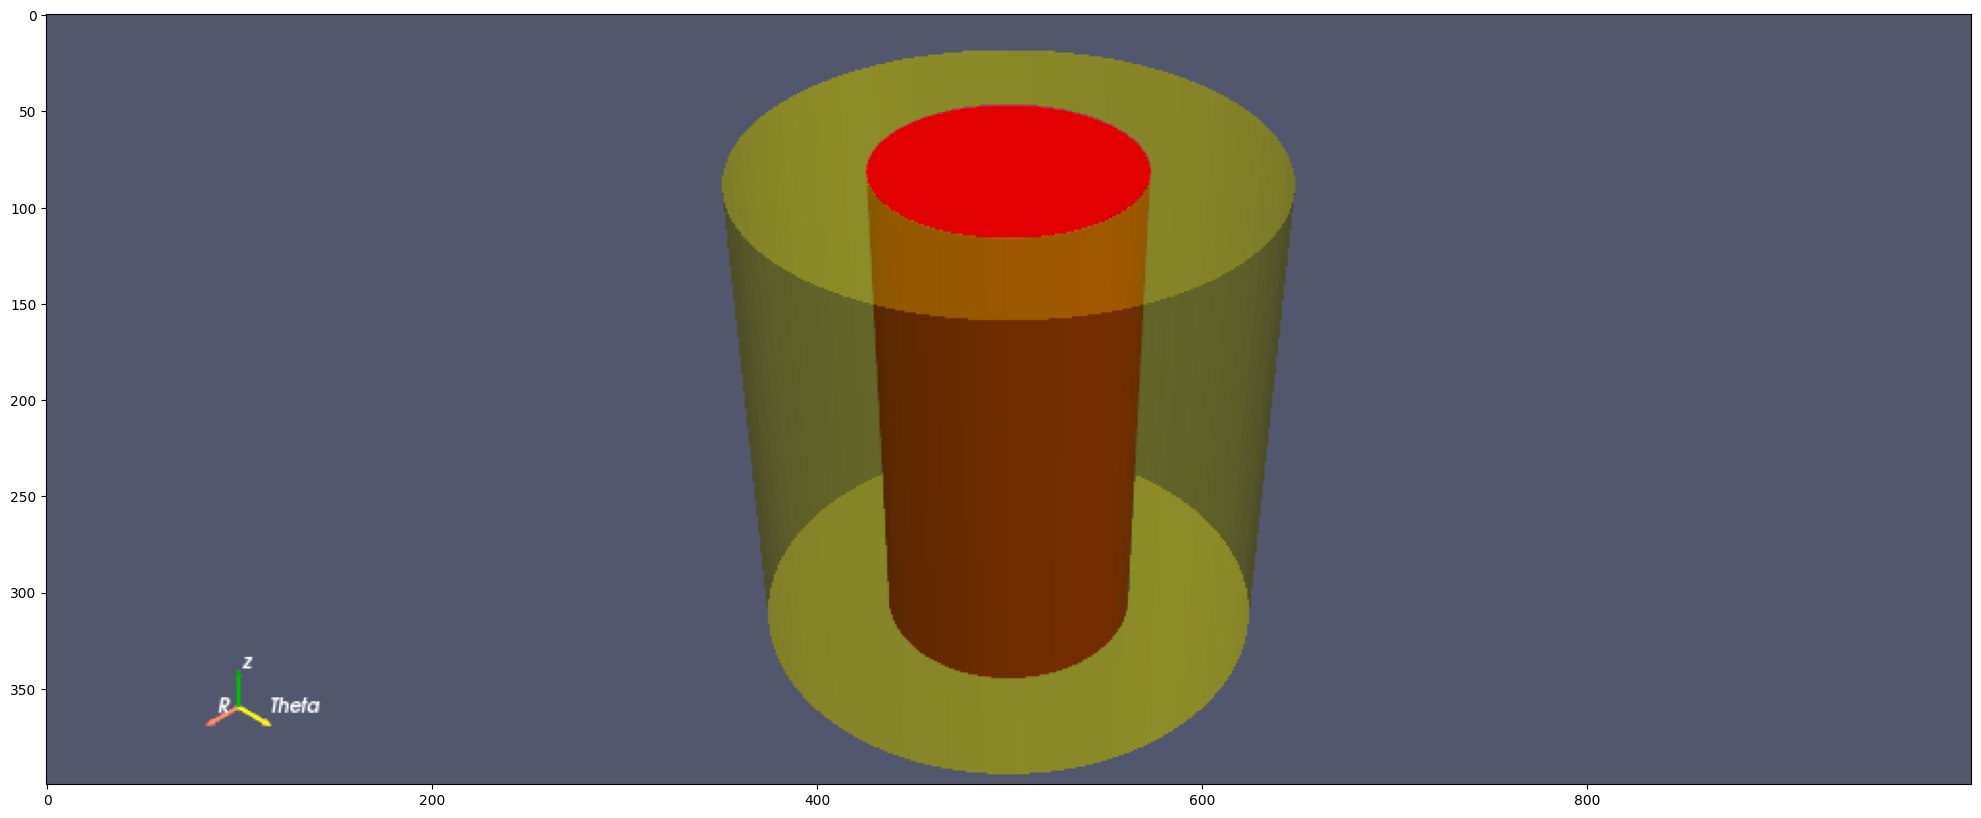

In [5]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $q_{nR_r}$


In [6]:
'''Parameters and data'''
# Source
diffusion_coeff_1 = 1.44*unit.cm
sigma_f_fuel = 0.1/unit.cm
sigma_a_1 = sigma_f_fuel * 1.20 #20% increase from fission
source_1 = 100./unit.cm**3/unit.second #to mimic fuel
# sanity check
assert sigma_a_1 >= sigma_f_fuel

# Reflector
diffusion_coeff_2 = 1.85*unit.cm
sigma_a_2 = 0.01226/unit.cm
source_2 = 0./unit.cm**3/unit.second

# Left and right normal diffusive fluxes
q_na = 0
#q_nb = u(b)/2

In [7]:
'''Diffusion lengths'''

import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))

L1 [cm] = 3.464e+00
L2 [cm] = 1.228e+01


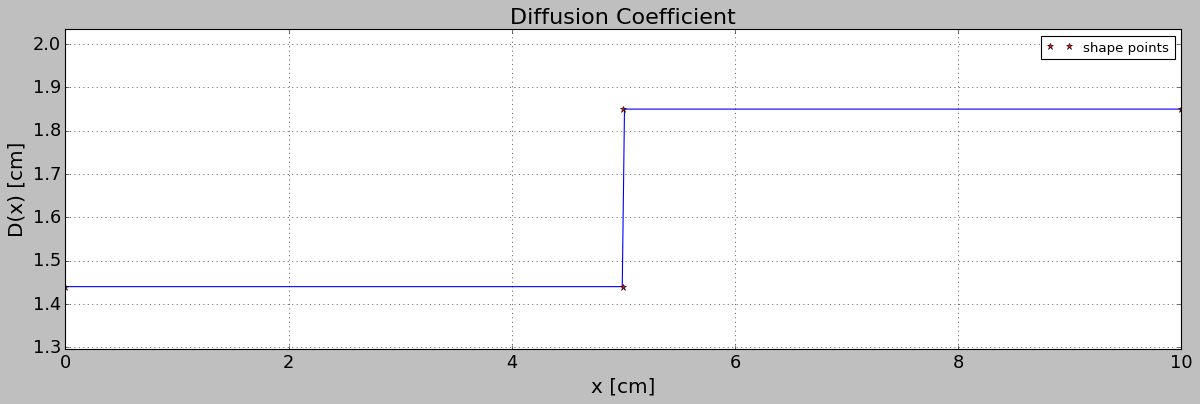

In [8]:
'''Diffusion coefficient function'''
from pyfem1d.toolkit import TargetFunction   

shape_pts = [(r_0, diffusion_coeff_1), (r_s, diffusion_coeff_1), 
             (r_s, diffusion_coeff_2), (r_r, diffusion_coeff_2)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*1.1])

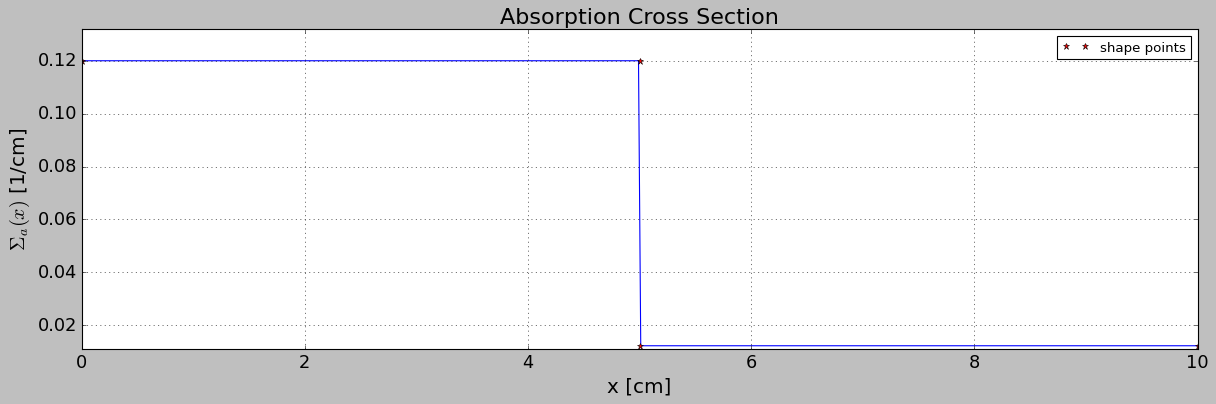

In [9]:
'''Absoption cross section function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(r_0, sigma_a_1), (r_s, sigma_a_1), 
             (r_s, sigma_a_2), (r_r, sigma_a_2)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2)*unit.cm*1.1])

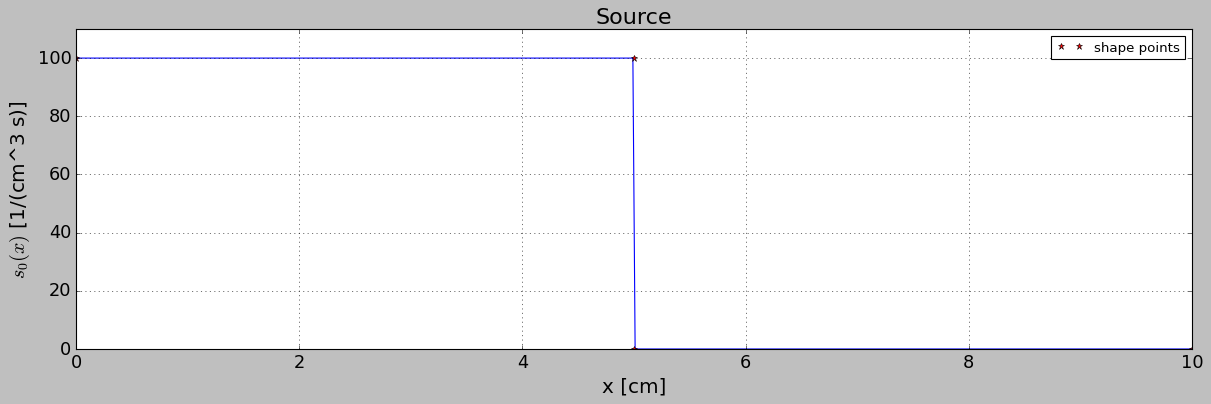

In [10]:
'''Source function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(r_0, source_1), (r_s, source_1), 
             (r_s, source_2), (r_r, source_2)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf"></a>

Specify basis functions distribution on the material domain and degree.

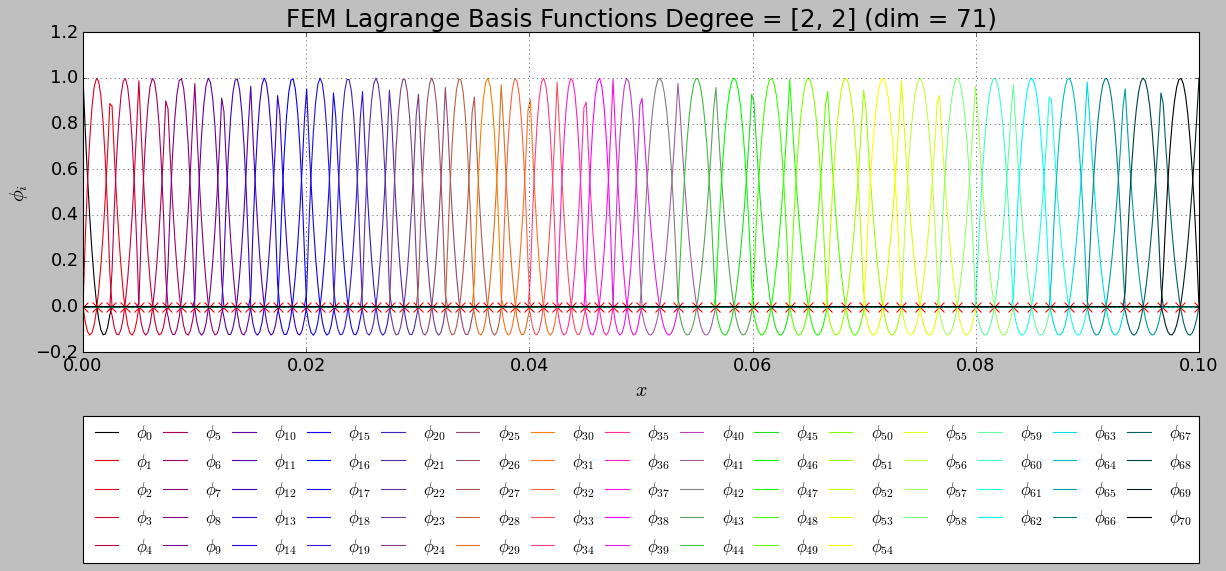

In [11]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2]
n_elem = [20,15]

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[r_0, r_s, r_r])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = \bigl(D\,\phi'_j,\phi'_i\bigr) + \bigl(\Sigma_a\,\phi_j,\phi_i\bigr) + 1/2\,\phi_j(R_r)\,\phi_i(R_r)\,R_r $

In [12]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'", coord_sys='cylindrical')
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v', coord_sys='cylindrical')

r_mtrx_b = femlb.boundary_inner_product_matrix('right', lambda x:1/2*r_r, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx + r_mtrx_b

In [13]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx, tol=1e-6) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

import numpy as np
print(np.linalg.matrix_rank(a_mtrx), a_mtrx.shape)

matrix is full rank.
71 (71, 71)


 + $b_i = (s_0,\phi_i)$

In [14]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v', coord_sys='cylindrical')

b_vec = s_vec

In [15]:
'''Compute optimal coefficient eigenvectors'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [16]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u

In [17]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime

### [Results](#toc)<a id="results"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [18]:
'''Plot solution'''

def plot_solution(x, u_values, q_values, 
                  x_reflected=None, u_values_reflected=None, q_values_reflected=None,
                  u_legend='Solution w/ Vacuum BC', 
                  q_legend='Flux w/ Vacuum BC'):
    
    import matplotlib.pyplot as plt
    (fig, ax1) = plt.subplots(1, figsize=(14, 6))

    ax1.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label=u_legend)
    if x_reflected is not None and u_values_reflected is not None:
        ax1.plot(x_reflected/unit.cm, u_values_reflected*unit.cm**2*unit.second, 'r--', label='Reflected')
        
    ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$', fontsize=18, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)

    # create a twin x axis to be shared
    ax2 = ax1.twinx()

    ax2.plot(x/unit.cm, q_values*unit.cm**2*unit.second, 'b-', label=q_legend)
    if x_reflected is not None and q_values_reflected is not None:
        ax2.plot(x_reflected/unit.cm, q_values_reflected*unit.cm**2*unit.second, 'b--', label='Reflected')

    ax2.set_ylabel(r"$q_h(x)$", fontsize=18, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax2.legend(loc='center right', fontsize=12)
    #ax2.set_ylim(0,2)
    #ax2.grid(True)

    plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

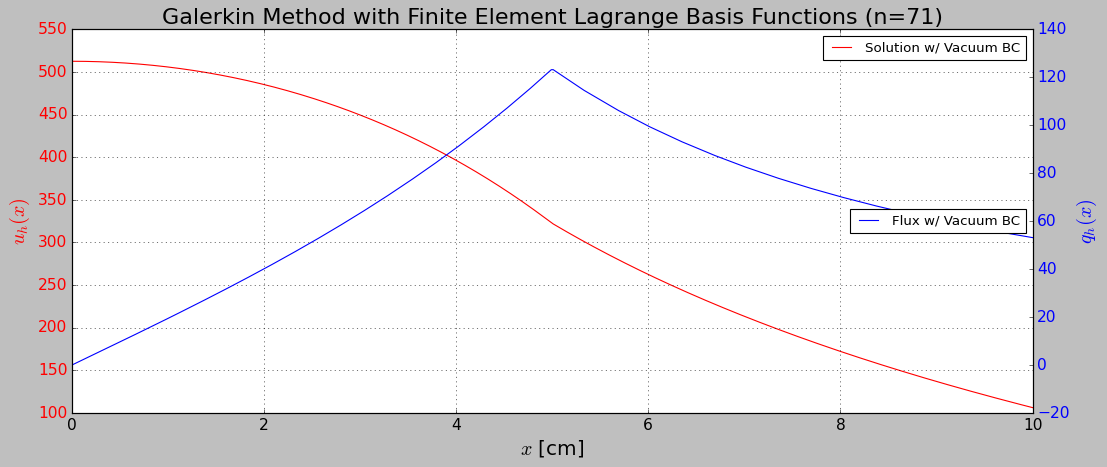

In [19]:
n_pts = 500
x_reflected = np.linspace(0, r_r, n_pts)
u_values_reflected = u_star(x_reflected)
q_values_reflected = -diffusion_coeff(x_reflected)*u_prime_star(x_reflected)

plot_solution(x_reflected, u_values_reflected, q_values_reflected)

In [20]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(0) [1/(cm^2 s)]= ', u_star(r_0)[0]*unit.cm**2*unit.second, '  u^*_N(r) [1/(cm^2 s)]= ', u_star(r_r)[0]*unit.cm**2*unit.second)
print("u^*'_N(0) [1/(cm^3 s)]= ", u_prime_star(r_0)[0]*unit.cm*unit.second, " u^*'_N(r) [1/(cm^3 s)]= ", u_prime_star(r_r)[0]*unit.cm*unit.second)
u_r0_reflected = u_star(r_0)[0]*unit.cm**2*unit.second

u^*_N(0) [1/(cm^2 s)]=  512.570441202323   u^*_N(r) [1/(cm^2 s)]=  106.31870105475542
u^*'_N(0) [1/(cm^3 s)]=  8.703516235351563  u^*'_N(r) [1/(cm^3 s)]=  -287268.00238338945


In [21]:
'''Flux at left boundary'''

print('q_na given    [#/(cm^2 s)]= ', q_na)
q_na_N = -(-diffusion_coeff(r_0)*u_prime_star(r_0)[0])*unit.cm**2*unit.second
print('q_na computed [#/(cm^2 s)]= ', q_na_N)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [#/(cm^2 s)]=  0
q_na computed [#/(cm^2 s)]=  0.001253306337890625


In [22]:
'''Flux at interface'''

q_ns_N = (-diffusion_coeff(r_s*.999)*u_prime_star(r_s*.999)[0])*unit.cm**2*unit.second
print('q_ns computed [#/(cm^2 s)]= ', q_ns_N)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)
q_ns_reflected = q_ns_N

q_ns computed [#/(cm^2 s)]=  123.34291908090272


In [23]:
'''Flux at interface'''

q_ns_N = (-diffusion_coeff(r_s*1.001)*u_prime_star(r_s*1.001)[0])*unit.cm**2*unit.second
print('q_ns computed [#/(cm^2 s)]= ', q_ns_N)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_ns computed [#/(cm^2 s)]=  123.32656574211636


In [24]:
'''Flux at right boundary'''

print('q_nb given    [#/(cm^2 s)]= ', u_star(r_r)[0]/2*unit.cm**2*unit.second)
q_nb_N = -diffusion_coeff(r_r)*u_prime_star(r_r)[0]*unit.cm**2*unit.second
print('q_nb computed [#/(cm^2 s)]= ', q_nb_N)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [#/(cm^2 s)]=  53.15935052737771
q_nb computed [#/(cm^2 s)]=  53.144580440927065


In [25]:
'''Total power (integrated source)'''
from scipy.integrate import quad
Source = lambda x: (source(x) - sigma_a(x) * u_star(x)) * x
(total_power_1, _) = quad(Source, r_0, r_s, limit=500)
(total_power_2, _) = quad(Source, r_s, r_r, limit=500)
total_power = (total_power_1 + total_power_2)*unit.cm**2*unit.second
print('integrated source [#/(cm^2 s)]=', total_power)

integrated source [#/(cm^2 s)]= 5.3159368386185575


In [26]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%(100*(q_na_N * 0 + q_nb_N * r_r - total_power)/total_power))

Total flux balance relative error [%] = -0.03 


In [27]:
x_vec = np.linspace(0, r_r, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
+0.00000e+00   +5.12570e+02     -1.25331e-03
+2.56410e-01   +5.12131e+02     +4.93596e+00
+5.12821e-01   +5.10811e+02     +9.89367e+00
+7.69231e-01   +5.08604e+02     +1.48925e+01
+1.02564e+00   +5.05502e+02     +1.99529e+01
+1.28205e+00   +5.01492e+02     +2.50958e+01
+1.53846e+00   +4.96558e+02     +3.03423e+01
+1.79487e+00   +4.90678e+02     +3.57143e+01
+2.05128e+00   +4.83830e+02     +4.12338e+01
+2.30769e+00   +4.75984e+02     +4.69238e+01
+2.56410e+00   +4.67108e+02     +5.28081e+01
+2.82051e+00   +4.57165e+02     +5.89112e+01
+3.07692e+00   +4.46115e+02     +6.52588e+01
+3.33333e+00   +4.33911e+02     +7.18775e+01
+3.58974e+00   +4.20503e+02     +7.87953e+01
+3.84615e+00   +4.05834e+02     +8.60415e+01
+4.10256e+00   +3.89844e+02     +9.36470e+01
+4.35897e+00   +3.72466e+02     +1.01644e+02
+4.61538e+00   +3.53626e+02     +1.10068e+02
+4.87179e+00   +3.33247e+02     +1.18953e+02
+5.12821e+00   +3.14016e+02     +1.20019e+02
+5.38462

In [28]:
'''Save text file with values'''

x_vec = np.linspace(r_0, r_r, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/cyl-reflected-diff.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('sphere-reflected-diff.txt')

## [Bare Source](#toc)<a id="bare"></a>

Consider a bare source slab exposed to vacuum for comparison to the reflected case above.

### [Data](#toc)<a id="data-bare"></a>

Solve problem with parameter values:

> + 0, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$

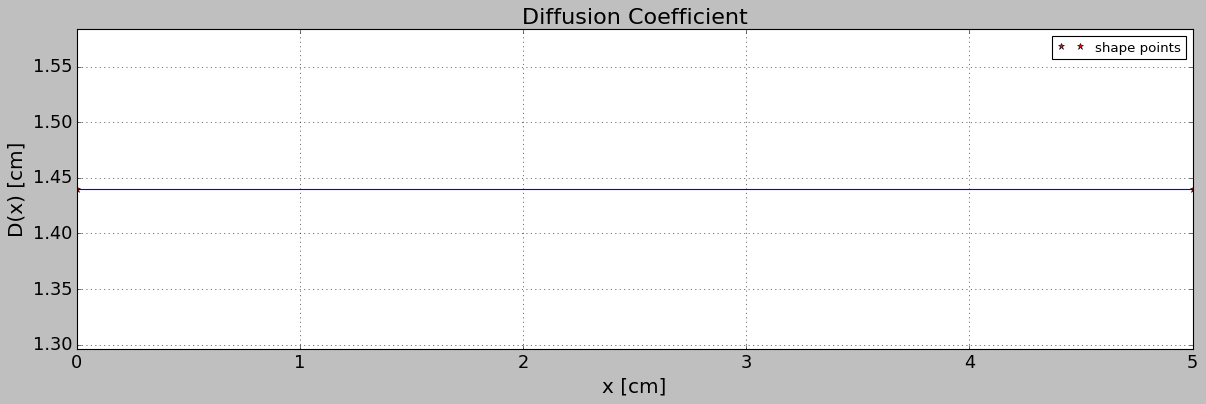

In [29]:
'''Diffusion coefficient function'''
from pyfem1d.toolkit import TargetFunction   

shape_pts = [(r_0, diffusion_coeff_1), (r_s, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[diffusion_coeff_1/unit.cm*.9, 
                      diffusion_coeff_1/unit.cm*1.1])

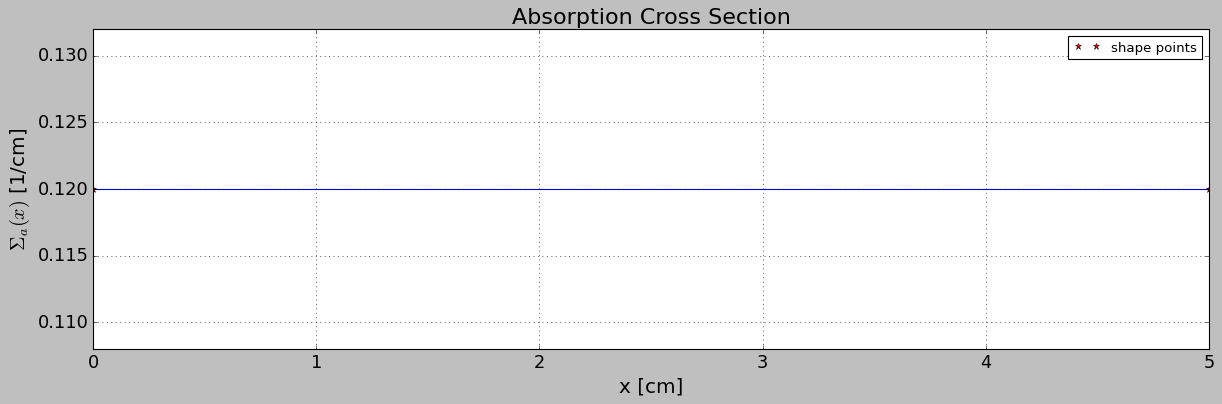

In [30]:
'''Absoption cross section function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(r_0, sigma_a_1), (r_s, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[sigma_a_1*unit.cm*.9, 
                   sigma_a_1*unit.cm*1.1])

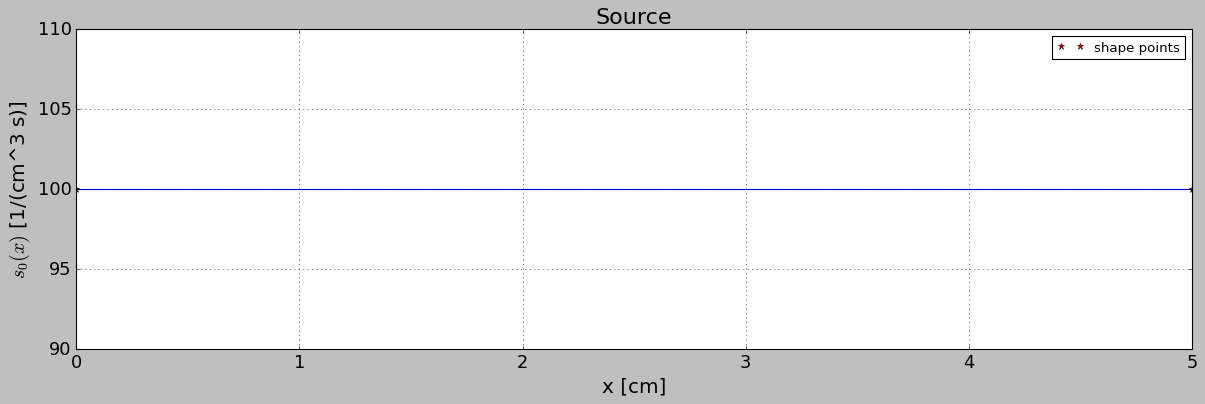

In [31]:
'''Source function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(r_0, source_1), (r_s, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[source_1*unit.cm**3*unit.second*.9, 
                   source_1*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-bare"></a>

Specify basis functions distribution on the material domain and degree.

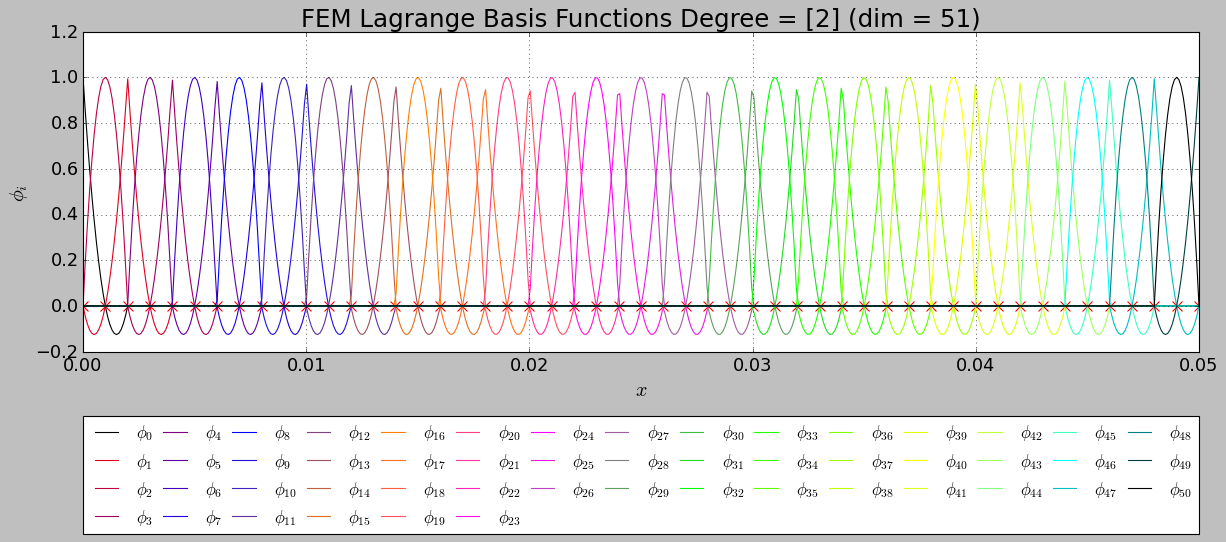

In [32]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2]
n_elem = [25]

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[r_0, r_s])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = \bigl(D\,\phi'_j,\phi'_i\bigr) + \bigl(\Sigma_a\,\phi_j,\phi_i\bigr) + 1/2\,\phi_j(R_s)\,\phi_i(R_s)\,R_s $

In [33]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'", coord_sys='cylindrical')
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v', coord_sys='cylindrical')

r_mtrx_b = femlb.boundary_inner_product_matrix('right', lambda x:1/2*r_s, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx + r_mtrx_b

In [34]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx, tol=1e-6) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

import numpy as np
print(np.linalg.matrix_rank(a_mtrx), a_mtrx.shape)

matrix is full rank.
51 (51, 51)


 + $b_i = (s_0,\phi_i)$

In [35]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v', coord_sys='cylindrical')
b_vec = s_vec

In [36]:
'''Compute optimal coefficient eigenvectors'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

### [Results](#toc)<a id="results-bare"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

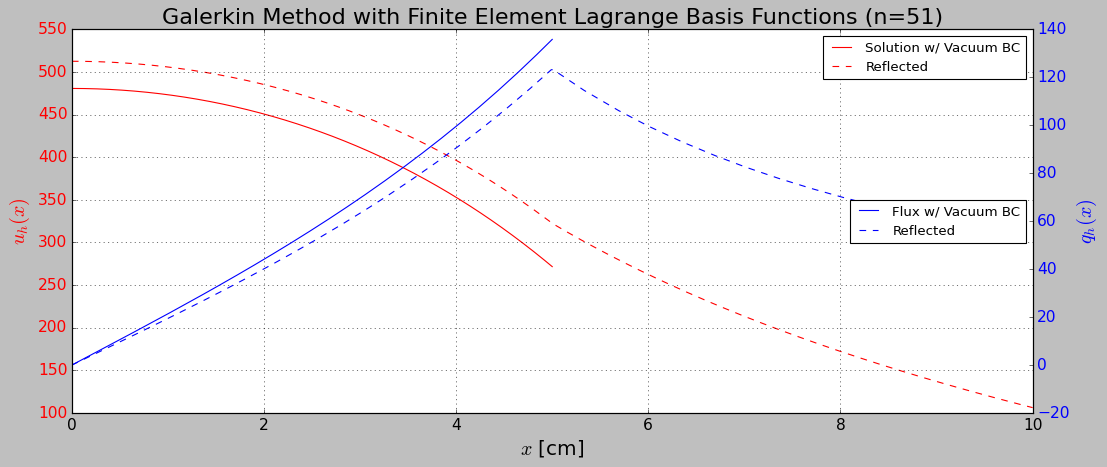

In [37]:
n_pts = 500
x = np.linspace(0, r_s, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values, x_reflected, u_values_reflected, q_values_reflected)

In [38]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(0) [1/(cm^2 s)]= ', u_star(r_0)[0]*unit.cm**2*unit.second, '  u^*_N(s) [1/(cm^2 s)]= ', u_star(r_s)[0]*unit.cm**2*unit.second)
print("u^*'_N(0) [1/(cm^3 s)]= ", u_prime_star(r_0)[0]*unit.cm*unit.second, " u^*'_N(s) [1/(cm^3 s)]= ", u_prime_star(r_s)[0]*unit.cm*unit.second)
u_r0_bare = u_star(r_0)[0]*unit.cm**2*unit.second

u^*_N(0) [1/(cm^2 s)]=  480.69259379890264   u^*_N(s) [1/(cm^2 s)]=  271.6806317175966
u^*'_N(0) [1/(cm^3 s)]=  4.898604397773743  u^*'_N(s) [1/(cm^3 s)]=  -943140.3992024517


In [39]:
'''u(r_0) comparison'''
print('u(r_0) gain w/ reflection [%] = ',(u_r0_reflected - u_r0_bare)/u_r0_bare*100)

u(r_0) gain w/ reflection [%] =  6.631649377305863


In [40]:
'''Flux at left boundary'''

print('q_na given    [#/(cm^2 s)]= ', q_na)
q_na_N = -(-diffusion_coeff(r_0)*u_prime_star(r_0)[0])*unit.cm**2*unit.second
print('q_na computed [#/(cm^2 s)]= ', q_na_N)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [#/(cm^2 s)]=  0
q_na computed [#/(cm^2 s)]=  0.0007053990332794189


In [41]:
'''Flux at right boundary'''

print('q_ns given    [#/(cm^2 s)]= ', u_star(r_s)[0]/2*unit.cm**2*unit.second)
q_ns_N = -diffusion_coeff(r_s)*u_prime_star(r_s)[0]*unit.cm**2*unit.second
print('q_ns computed [#/(cm^2 s)]= ', q_ns_N)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)
q_ns_bare = q_ns_N

q_ns given    [#/(cm^2 s)]=  135.8403158587983
q_ns computed [#/(cm^2 s)]=  135.81221748515304


In [42]:
'''qn(x_s) comparison'''
print('qn(x_s) reduction w/ reflection [%] = ',(q_ns_reflected - q_ns_bare)/q_ns_bare*100)

qn(x_s) reduction w/ reflection [%] =  -9.181278853364915


In [43]:
'''Total power (integrated source)'''
from scipy.integrate import quad
Source = lambda x: (source(x) - sigma_a(x) * u_star(x)) * x
(total_power_1, _) = quad(Source, r_0, r_s, limit=500)
total_power = total_power_1*unit.cm**2*unit.second
print('integrated source [#/(cm^2 s)]=', total_power)

integrated source [#/(cm^2 s)]= 6.79201574116365


In [44]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%(100*(q_na_N * 0 + q_ns_N * r_s - total_power)/total_power))

Total flux balance relative error [%] = -0.02 


In [45]:
x_vec = np.linspace(0, r_s, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
+0.00000e+00   +4.80693e+02     -7.05399e-04
+1.28205e-01   +4.80572e+02     +2.71327e+00
+2.56410e-01   +4.80209e+02     +5.42910e+00
+3.84615e-01   +4.79605e+02     +8.14976e+00
+5.12821e-01   +4.78758e+02     +1.08813e+01
+6.41026e-01   +4.77667e+02     +1.36210e+01
+7.69231e-01   +4.76332e+02     +1.63757e+01
+8.97436e-01   +4.74751e+02     +1.91501e+01
+1.02564e+00   +4.72922e+02     +2.19379e+01
+1.15385e+00   +4.70843e+02     +2.47542e+01
+1.28205e+00   +4.68513e+02     +2.75959e+01
+1.41026e+00   +4.65929e+02     +3.04564e+01
+1.53846e+00   +4.63088e+02     +3.33626e+01
+1.66667e+00   +4.59988e+02     +3.62968e+01
+1.79487e+00   +4.56625e+02     +3.92590e+01
+1.92308e+00   +4.52995e+02     +4.22808e+01
+2.05128e+00   +4.49096e+02     +4.53335e+01
+2.17949e+00   +4.44922e+02     +4.84301e+01
+2.30769e+00   +4.40470e+02     +5.15916e+01
+2.43590e+00   +4.35735e+02     +5.47902e+01
+2.56410e+00   +4.30711e+02     +5.80525e+01
+2.69231